## Importing the required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import keras
from keras import models
from keras import layers

from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.vgg19 import VGG19

import warnings
warnings.filterwarnings('ignore')

## Loading the data in the form of dataframe which contain the ImagePath and Labels

In [2]:
parasitized = os.listdir('kaggle/input/Cell_Images_Dataset/Parasitized')
uninfected = os.listdir('kaggle/input/Cell_Images_Dataset/Uninfected')

parasitized= ["kaggle/input/Cell_Images_Dataset/Parasitized" + '/' +  parasitize for parasitize in parasitized]
uninfected= ["kaggle/input/Cell_Images_Dataset/Uninfected" + '/' +  uninfect for uninfect in uninfected]

labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
data = parasitized + uninfected

df = pd.DataFrame({'Image_Path': data , 'Labels': labels})

df.head()

,Image_Path,Labels
0,kaggle/input/Cell_Images_Dataset/Parasitized/C...,parasitized
1,kaggle/input/Cell_Images_Dataset/Parasitized/C...,parasitized
2,kaggle/input/Cell_Images_Dataset/Parasitized/C...,parasitized
3,kaggle/input/Cell_Images_Dataset/Parasitized/C...,parasitized
4,kaggle/input/Cell_Images_Dataset/Parasitized/C...,parasitized


## Displaying five Infected and five Uninfected Images using the dataframe

Displaying 5 Infected Images: 



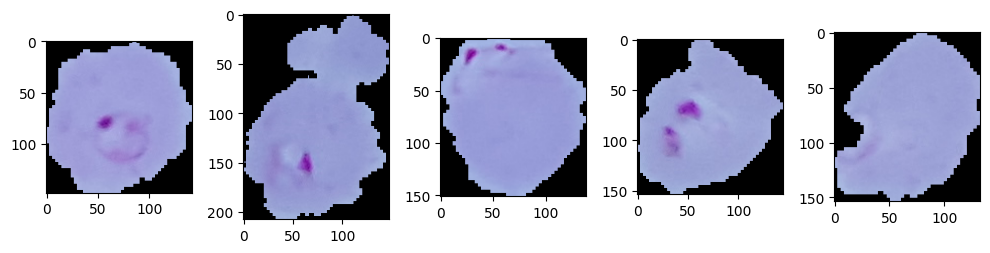

 
 Displaying 5 Uninfected Images: 



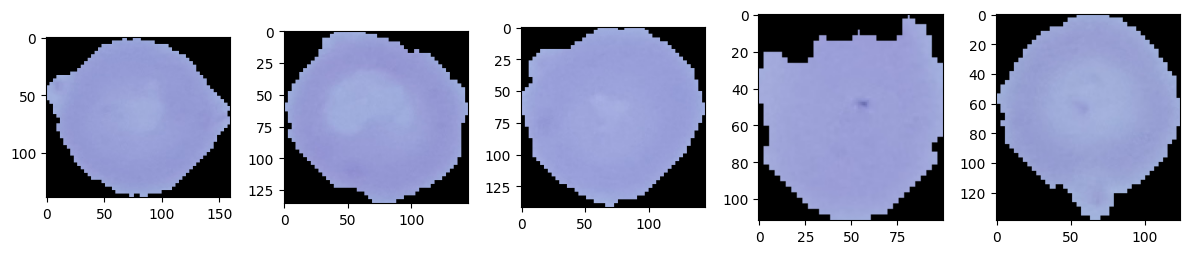

In [3]:
print("Displaying 5 Infected Images: \n")
plt.figure(figsize = (10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print(" \n Displaying 5 Uninfected Images: \n")
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

## Viewing the distribution of samples of Infected and Uninfected categories in Bar Plot 

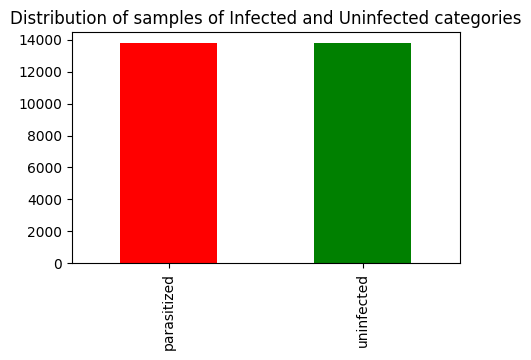

In [4]:
plt.figure(figsize = (5,3))
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples of Infected and Uninfected categories')
plt.show()

## Train-Test split using train_test_split() { train size : 80% , test size : 20% }

In [5]:
train, test = train_test_split(df, test_size = 0.2)

## Data augmentation using ImageDataGenerator

In [6]:
img_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                 zoom_range=0.1, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

## User-defined function for plotting loss and accuracy of training vs validation data

In [7]:
def plt_acc_los(mdl):
    
    # retrieving loss, accuracy, validation loss, validation accuracy values using model.history
    loss = mdl.history['loss']
    accuracy = mdl.history['accuracy']
    validation_loss = mdl.history['val_loss']
    validation_accuracy = mdl.history['val_accuracy']
    
    # plotting loss in Training and Validation data
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training vs Validation ')
    plt.legend(loc='upper left')
    
    # plotting Accuracy in Training and Validation data
    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.title('Accuracy : Training vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

## Building CNN Model 

In [8]:
x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',
                                           target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')

x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',
                                         target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model_CNN = model.fit(x_train, steps_per_epoch=100, validation_data=x_test, 
                      validation_steps=100, epochs = 8)

Epoch 1/8
100/100 [==============================] - 20s 155ms/step - loss: 2.8981 - accuracy: 0.4990 - val_loss: 0.6891 - val_accuracy: 0.5340
Epoch 2/8
100/100 [==============================] - 19s 191ms/step - loss: 0.7010 - accuracy: 0.5150 - val_loss: 0.6952 - val_accuracy: 0.5040
Epoch 3/8
100/100 [==============================] - 18s 176ms/step - loss: 0.7040 - accuracy: 0.5150 - val_loss: 0.7185 - val_accuracy: 0.4980
Epoch 4/8
100/100 [==============================] - 15s 149ms/step - loss: 0.7027 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.5160
Epoch 5/8
100/100 [==============================] - 14s 138ms/step - loss: 0.6981 - accuracy: 0.5320 - val_loss: 0.6896 - val_accuracy: 0.5370
Epoch 6/8
100/100 [==============================] - 15s 151ms/step - loss: 0.6961 - accuracy: 0.5020 - val_loss: 0.7056 - val_accuracy: 0.4880
Epoch 7/8
100/100 [==============================] - 15s 154ms/step - loss: 0.6918 - accuracy: 0.5610 - val_loss: 0.6947 - val_accuracy:

111/111 [==============================] - 9s 77ms/step - loss: 0.6874 - accuracy: 0.5399

 Evaluation on CNN :  [0.6874473690986633, 0.5399274230003357] 



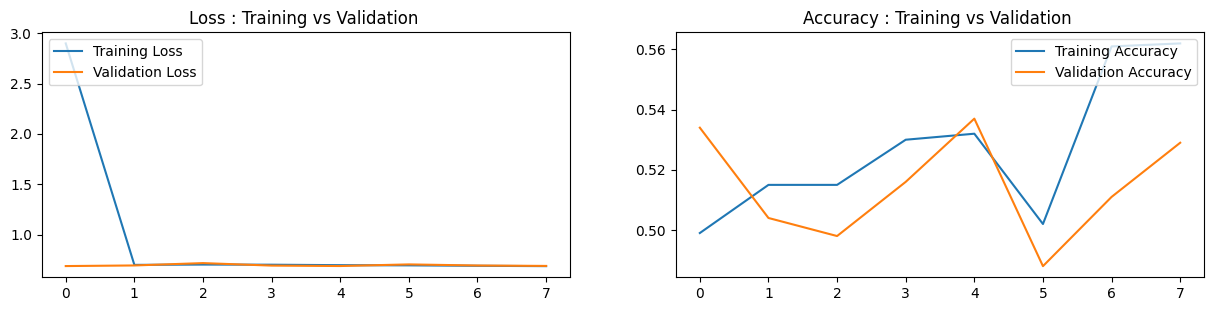

In [12]:
print("\n Evaluation on CNN : ", model.evaluate(x_test),"\n")
plt_acc_los(model_CNN)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [14]:
model.save("model_CNN.h5")

## Building ResNet50 pre-trained Model

In [15]:
x1_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',
                                            target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')

x1_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary', 
                                          target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.


In [16]:
resnet_model=resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))
model1=Sequential()
model1.add(resnet_model)
model1.add(Flatten())
model1.add(Dense(1024,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

In [17]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model_resnet = model1.fit(x1_train, steps_per_epoch=100, validation_data=x1_test, 
                          validation_steps=100, epochs = 5)

Epoch 1/5
100/100 [==============================] - 64s 519ms/step - loss: 2.1422 - accuracy: 0.7330 - val_loss: 504.5670 - val_accuracy: 0.5430
Epoch 2/5
100/100 [==============================] - 53s 529ms/step - loss: 0.2989 - accuracy: 0.8750 - val_loss: 9.7041 - val_accuracy: 0.9220
Epoch 3/5
100/100 [==============================] - 61s 607ms/step - loss: 1.3756 - accuracy: 0.7810 - val_loss: 188.7182 - val_accuracy: 0.5270
Epoch 4/5
100/100 [==============================] - 65s 655ms/step - loss: 0.5075 - accuracy: 0.8206 - val_loss: 22.2907 - val_accuracy: 0.6730
Epoch 5/5
100/100 [==============================] - 67s 669ms/step - loss: 0.3651 - accuracy: 0.8860 - val_loss: 1.1651 - val_accuracy: 0.8970


111/111 [==============================] - 15s 136ms/step - loss: 0.8316 - accuracy: 0.9156

 Evaluation of RESNET50  [0.8316130042076111, 0.9156079888343811] 



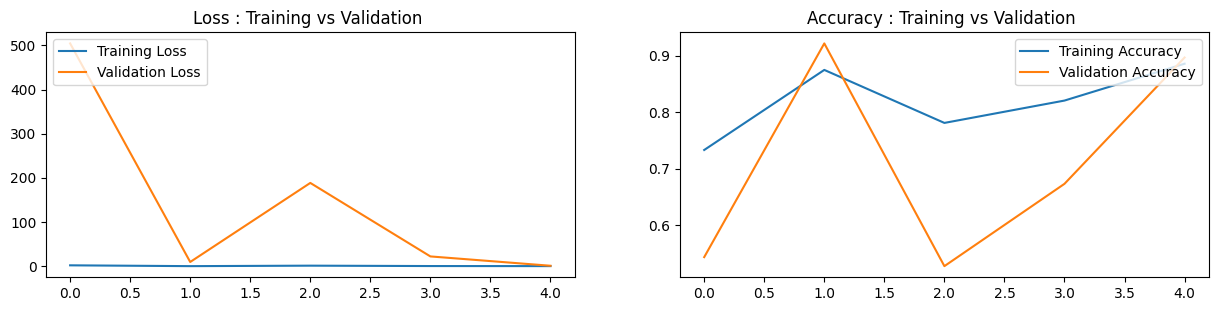

In [19]:
print("\n Evaluation of RESNET50 ", model1.evaluate(x1_test),"\n")
plt_acc_los(model_resnet)

In [20]:
model1.save("model_ResNet50.h5")

## Building VGG19 Pre-trained Model

In [21]:
vg19 = VGG19(input_shape=(64,64,3), weights="imagenet", include_top=False)

for layer in vg19.layers:
    layer.trainable = False

model2=Sequential()
model2.add(vg19)
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))


model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
model_VGG = model2.fit(x1_train, validation_data=x1_test, epochs = 4, shuffle = False)

Epoch 1/4
1764/1764 [==============================] - 505s 283ms/step - loss: 0.7585 - accuracy: 0.8905 - val_loss: 0.2540 - val_accuracy: 0.9083
Epoch 2/4
1764/1764 [==============================] - 528s 300ms/step - loss: 0.2712 - accuracy: 0.9054 - val_loss: 0.2374 - val_accuracy: 0.9065
Epoch 3/4
1764/1764 [==============================] - 533s 302ms/step - loss: 0.2566 - accuracy: 0.9113 - val_loss: 0.2474 - val_accuracy: 0.9047
Epoch 4/4
1764/1764 [==============================] - 532s 302ms/step - loss: 0.2496 - accuracy: 0.9142 - val_loss: 0.2432 - val_accuracy: 0.9102


111/111 [==============================] - 29s 259ms/step - loss: 0.2364 - accuracy: 0.9129

 Evaluation of VGG19  [0.23636238276958466, 0.9128856658935547] 



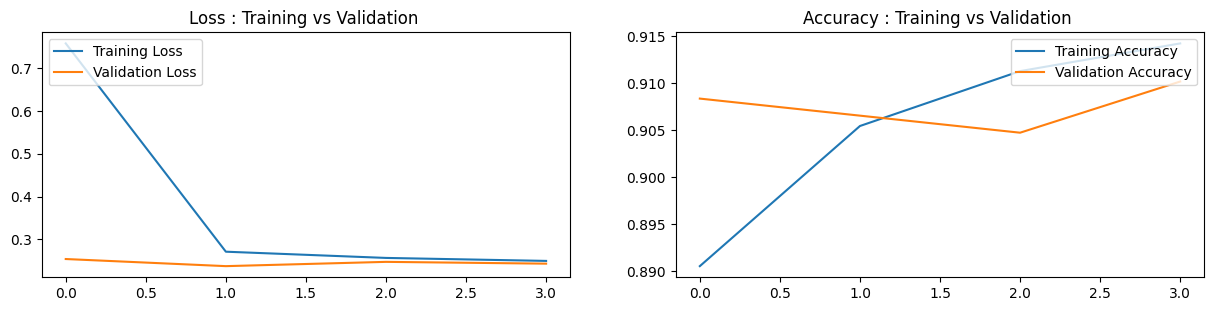

In [23]:
print("\n Evaluation of VGG19 ", model2.evaluate(x1_test),"\n")
plt_acc_los(model_VGG)

In [24]:
model2.save("model_vgg19.h5")

### Based on the evaluation metrics VGG19 performing better than CNN and ResNet50

### Checking whether the VGG model is predicting the image as infected or not (Input : Uninfected Image)

In [25]:
category = ['Parasitized', 'Uninfected']

def prepare(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img = img / 255
    img_array = cv2.resize(img, (64, 64))
    
    return (img_array.reshape(-1, 64, 64, 3))

### Loading the saved VGG19 model

In [28]:
model_final = tf.keras.models.load_model("model_vgg19.h5")

In [29]:
# filepath of infected : kaggle/input/Cell_Images_Dataset/Parasitized/C39P4thinF_original_IMG_20150622_105253_cell_108.png
# filepath of uninfected : kaggle/input/Cell_Images_Dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png

# Input : Uninfected Image
prediction = model_final.predict([prepare("kaggle/input/Cell_Images_Dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png")])

if np.argmax(prediction) == 1:
    print("Output : Infected cell")
else:
    print("Output : Uninfected cell")

1/1 [==============================] - 1s 1s/step
Output : Uninfected cell
